#### Prepare a prediction model for profit of 50_startups data.
#### Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years<br>
Administration -- spend on administration in the past few years <br>
Marketing Spend -- spend on Marketing in the past few years<br>
State -- states from which data is collected<br>
Profit  -- profit of each state in the past few years


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as smf
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [10]:
data=pd.read_csv(r'C:\Users\Dell\Downloads\50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


#### <font color ='Brown'> Preforming EDA </font>

In [11]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<font color= 'Brown' > Verifying the data types for columns</font>

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


We can say that data types of all columns are fine.

<font color = 'Brown'> Renaming the columns for ease of use</font>

In [27]:
df=data.copy()
df=df.rename({"R&D Spend":'RnD',"Administration":'admin',"Marketing Spend":'marketing',"State":'state',"Profit":'profit'},axis=1)
df.head()

,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#### <font color ='Brown'>Checking for Null values </font>

In [28]:
df.isnull().sum()

RnD          0
admin        0
marketing    0
state        0
profit       0
dtype: int64

As we can see there is no null values on dataset.

#### <font color ='Brown'> Checking for duplicate values </font>

In [29]:
df[df.duplicated()]

,RnD,admin,marketing,state,profit


There is no duplicate values.

#### <font color='Brown'> Correlation Analysis for Dataset </font>

In [30]:
df.corr(numeric_only= True)

,RnD,admin,marketing,profit
RnD,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
marketing,0.724248,-0.032154,1.000000,0.747766
profit,0.972900,0.200717,0.747766,1.000000


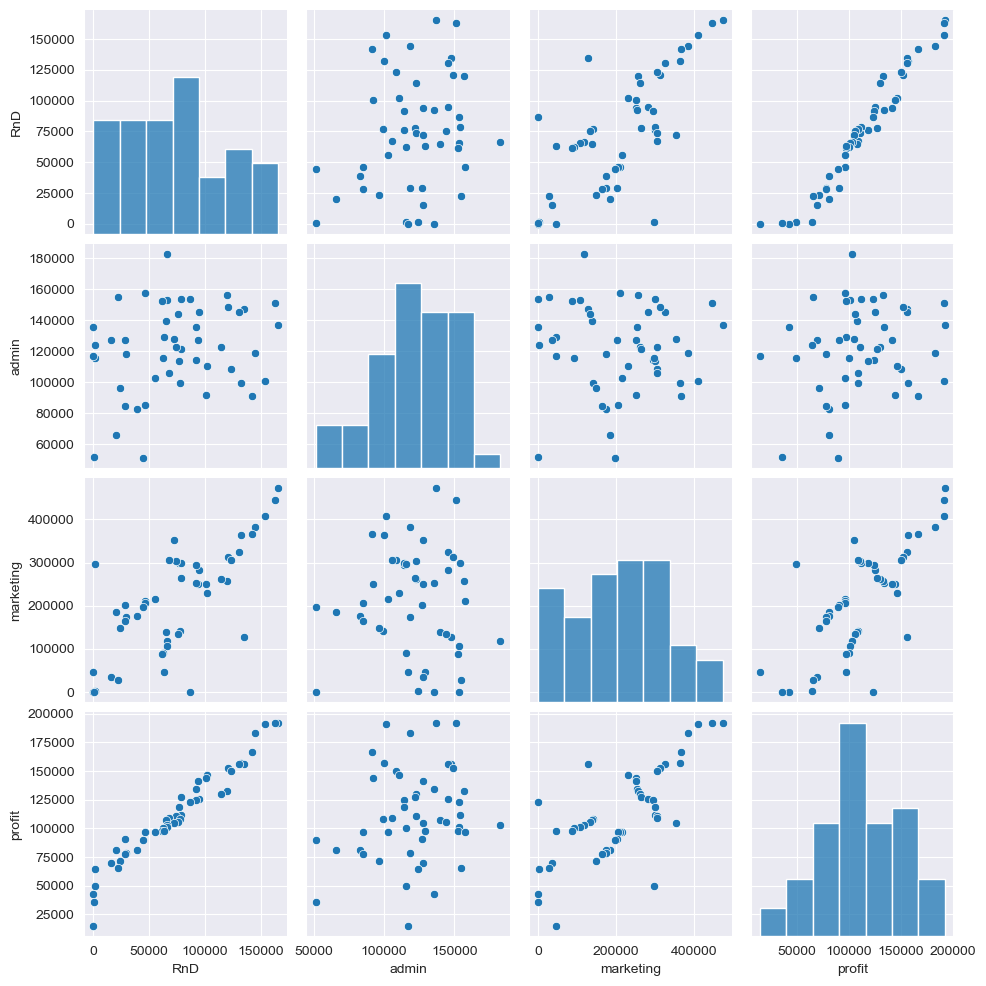

In [31]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

### Finding outliers 

<Axes: >

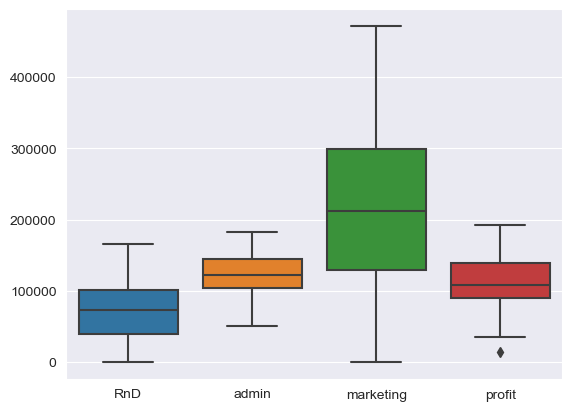

In [32]:
sns.boxplot(df)

#### There are Outlier in the Profit that is our Dependent Variable . Finding the value of outlier to remove it to reduce its ffect on skewness.

In [33]:
Q1 = np.quantile(df.profit,0.25)
Q3 = np.quantile(df.profit,0.75)
med = np.median(df.profit)
IQR = Q3 - Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
print('First Quantile=', Q1,'\n' 'Second Quantile=', med,'\n' 'Third Quantile=', Q3,'\n'
      'Inter-Quartile Range=', IQR,'\n' 'Upper Whisker=', upper_bound,'\n' 'Lower Whisker=', lower_bound)

First Quantile= 90138.9025 
Second Quantile= 107978.19 
Third Quantile= 139765.97749999998 
Inter-Quartile Range= 49627.07499999998 
Upper Whisker= 214206.58999999997 
Lower Whisker= 15698.290000000023


In [34]:
Outliers = df.profit[(df.profit <= lower_bound) | (df.profit >= upper_bound)]
print('The outlier in the boxplot:',Outliers)


The outlier in the boxplot: 49    14681.4
Name: profit, dtype: float64


In [35]:
df[df.index.isin([49])]

,RnD,admin,marketing,state,profit
49,0.0,116983.8,45173.06,California,14681.4


#### Before replacing/removing the outlier from the dataset lets, prepare the model and check which outlier removing method will be good to use. Lets calculate the R-square value for the models to find the best fit model.


In [36]:
raw_model = sm.ols("profit~RnD+admin+marketing", data = df).fit()
raw_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           4.53e-30
Time:                        19:55:29   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD            0.8057      0.045     17.846      0.000       0.715       0.897
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
raw_model.rsquared , raw_model.rsquared_adj 

(0.9507459940683246, 0.9475337762901719)

#### When replacing outliers with Median

In [38]:
df.profit.median()

107978.19

Text(0.5, 1.0, 'Profit before median imputation')

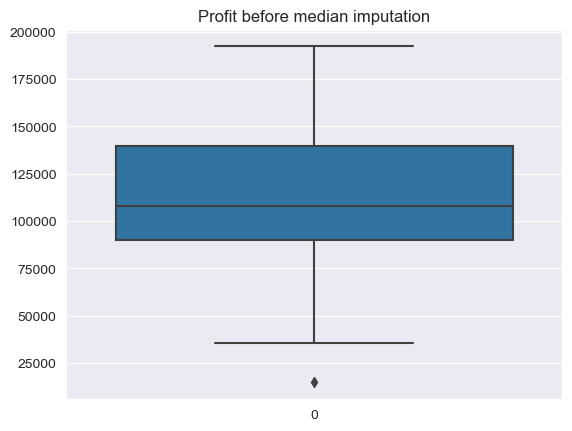

In [39]:
df1=df.copy()
sns.boxplot(df1['profit'])
plt.title('Profit before median imputation')

In [40]:
for i in df1['profit']:
    q1 = np.quantile(df.profit,0.25)
    q3 = np.quantile(df.profit,0.75)
    med = np.median(df.profit)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['profit'] = df1['profit'].replace(i, np.median(df2['profit']))
sns.boxplot(df2['profit'])
plt.title('Profit after median imputation')
plt.show()

NameError: name 'df2' is not defined

#### We can try to build model on data without outliers and compare r-square 

In [24]:
after_median_imputation_model = sm.ols("profit~RnD+admin+marketing", data = df1).fit()
# Finding rsquared values
after_median_imputation_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     171.3
Date:                Sun, 25 Feb 2024   Prob (F-statistic):           5.72e-25
Time:                        20:14:23   Log-Likelihood:                -534.95
No. Observations:                  50   AIC:                             1078.
Df Residuals:                      46   BIC:                             1086.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.596e+04   7957.380      7.032      0.000    3.99e+04     7.2e+04
RnD            0.7471      0.055     13.667      0.000       0.637       0.857
admin         -0.0149      0.062     -0.241      0.810      -0.139       0.109
marketing      0.0221      0.020      1.108      0.273      -0.018       0.062
==============================================================================
Omnibus:                       45.726   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.622
Skew:                           2.239   Prob(JB):                     1.53e-52
Kurtosis:                      12.720   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### We have to try other methods as well as we can see that the model after median imputation is not good. We can try mean imputation and then compare r-square values.

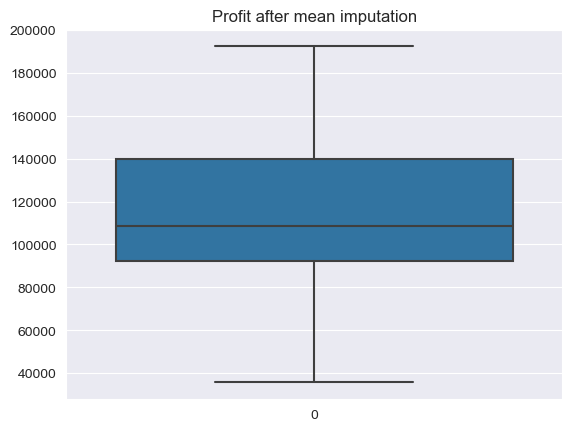

In [41]:
df2=df.copy()
for i in df2['profit']:
    q1 = np.quantile(df2.profit,0.25)
    q3 = np.quantile(df2.profit,0.75)
    med = np.median(df2.profit)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['profit'] = df2['profit'].replace(i, np.mean(df2['profit']))
sns.boxplot(df2['profit'])
plt.title('Profit after mean imputation')
plt.show()

In [42]:
after_mean_imputation_model = sm.ols("profit~RnD+admin+marketing", data = df2).fit()
# Finding rsquared values
after_mean_imputation_model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     158.8
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           2.82e-24
Time:                        19:55:48   Log-Likelihood:                -536.67
No. Observations:                  50   AIC:                             1081.
Df Residuals:                      46   BIC:                             1089.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.619e+04   8236.731      6.822      0.000    3.96e+04    7.28e+04
RnD            0.7447      0.057     13.162      0.000       0.631       0.859
admin         -0.0144      0.064     -0.226      0.823      -0.143       0.114
marketing      0.0219      0.021      1.061      0.294      -0.020       0.063
==============================================================================
Omnibus:                       50.346   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.669
Skew:                           2.466   Prob(JB):                     1.55e-67
Kurtosis:                      14.107   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### As we can see mean imputation model even below median imputation. Now we have to remove the outlier and then test the r-square value.

In [43]:
df3=df.copy()
def drop_outliers(data, field_name):
    iqr = 1.5*(np.percentile(data[field_name], 75) - np.percentile(data[field_name], 25))
    data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name], 75))].index, inplace=True)
    data.drop(data[data[field_name] < (np.percentile(data[field_name], 25) - iqr)].index, inplace=True)

Text(0.5, 1.0, 'Profit after removing outliers')

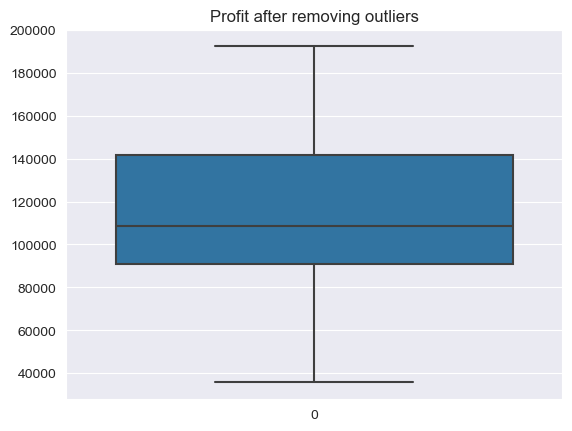

In [44]:
drop_outliers(df3, 'profit')
sns.boxplot(df3.profit)
plt.title('Profit after removing outliers')

In [45]:
removed_outlier_model = sm.ols("profit~RnD+admin+marketing", data = df3).fit()
# Finding rsquared values
removed_outlier_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           8.85e-32
Time:                        19:55:51   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RnD            0.7830      0.038     20.470      0.000       0.706       0.860
admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
marketing      0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Exploratory Data Anlaysis

In [46]:
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)

Text(0.5, 1.0, 'Profit')

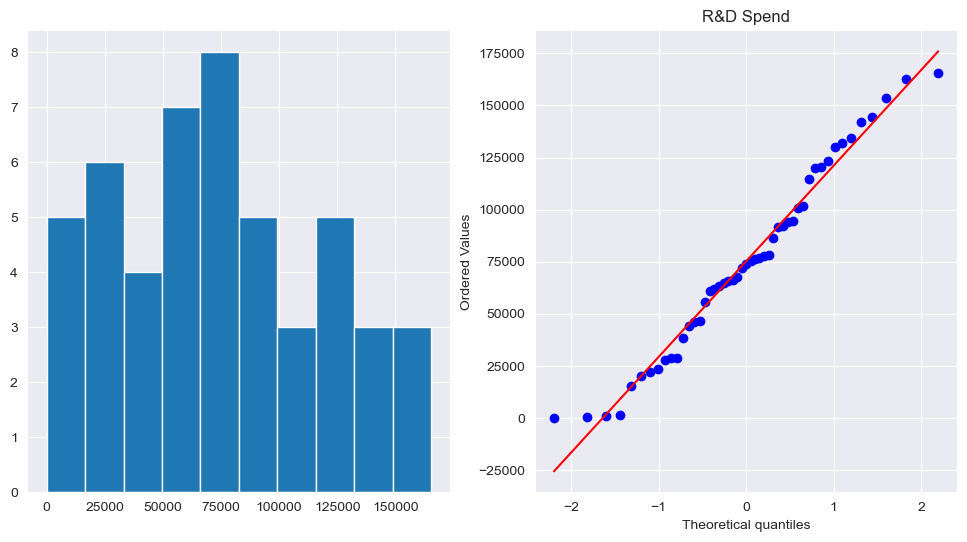

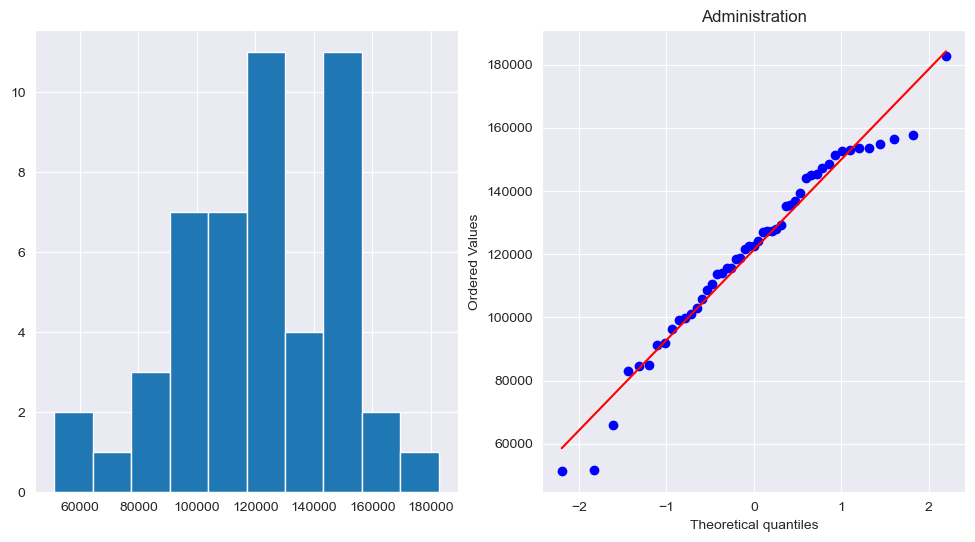

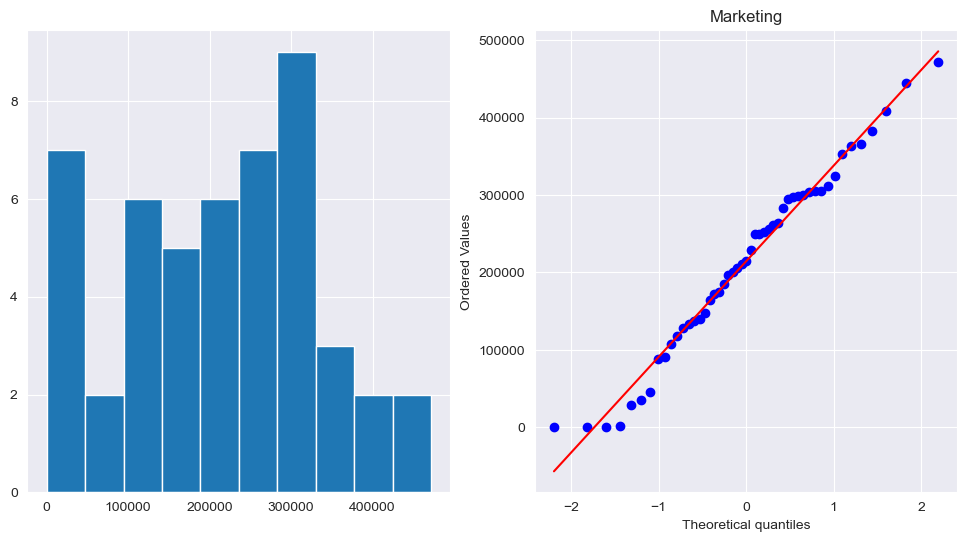

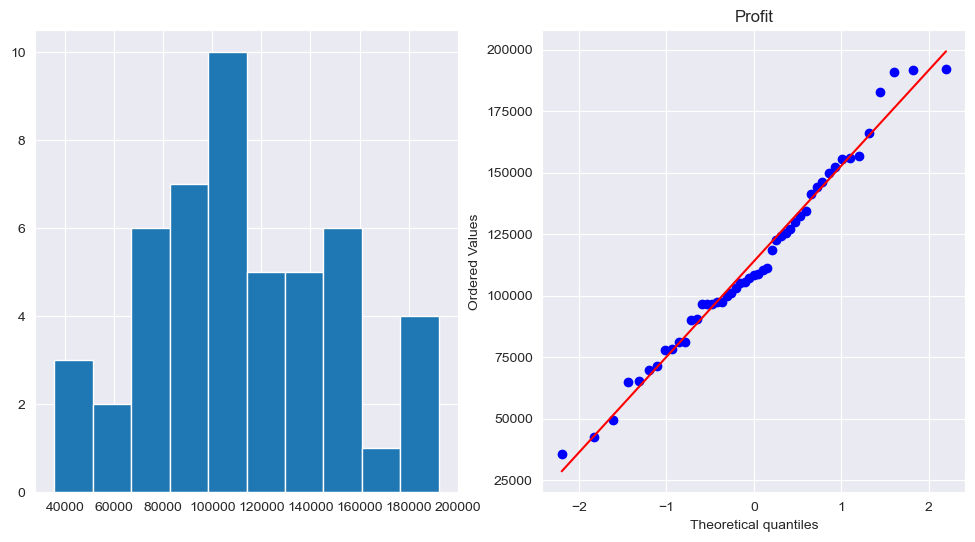

In [47]:
plot_data(df3,'RnD')
plt.title('R&D Spend')
plot_data(df3,'admin')
plt.title('Administration')
plot_data(df3,'marketing')
plt.title('Marketing')
plot_data(df3,'profit')
plt.title('Profit')

<Axes: ylabel='count'>

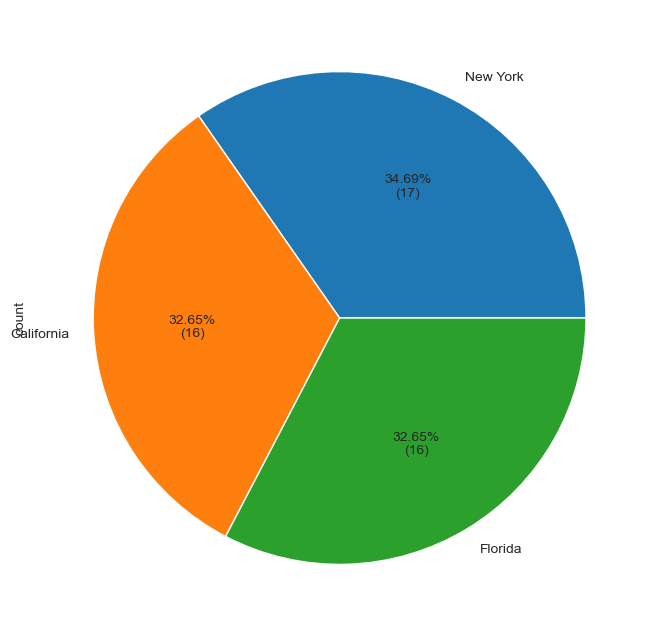

In [48]:
plt.figure(figsize=(8,8))
df3['state'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df3['state'].value_counts().sum())))

In [49]:
df3.state.value_counts()

state
New York      17
California    16
Florida       16
Name: count, dtype: int64

#### Square root Transformations

<Axes: xlabel='admin', ylabel='Density'>

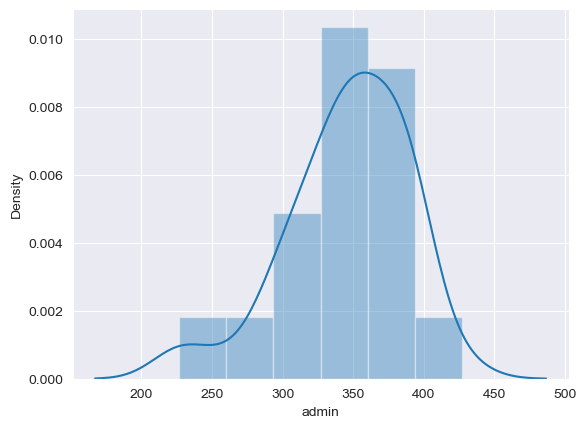

In [50]:
sns.distplot(np.sqrt(df3['admin']), bins = 6, kde = True)

<Axes: xlabel='marketing', ylabel='Density'>

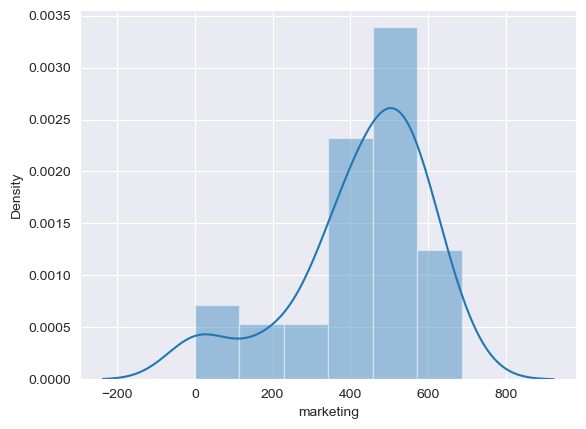

In [51]:
sns.distplot(np.sqrt(df3['marketing']), bins = 6, kde = True)

<Axes: xlabel='RnD', ylabel='Density'>

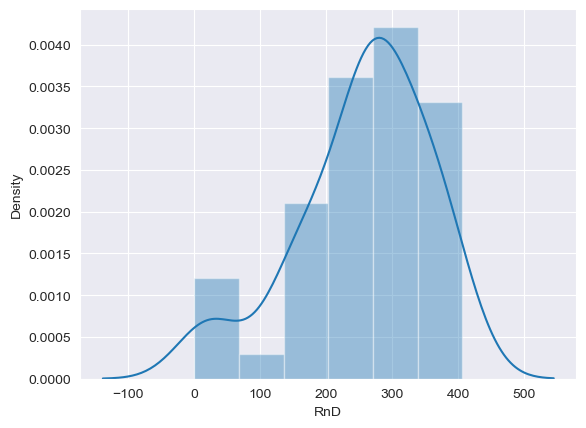

In [52]:
sns.distplot(np.sqrt(df3['RnD']), bins = 6, kde = True)

#### Cube root transformations

<Axes: xlabel='RnD', ylabel='Density'>

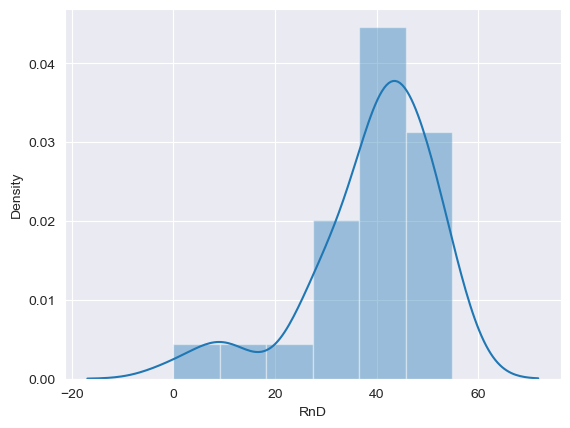

In [53]:
sns.distplot(np.cbrt(df3['RnD']), bins = 6, kde = True)

<Axes: xlabel='admin', ylabel='Density'>

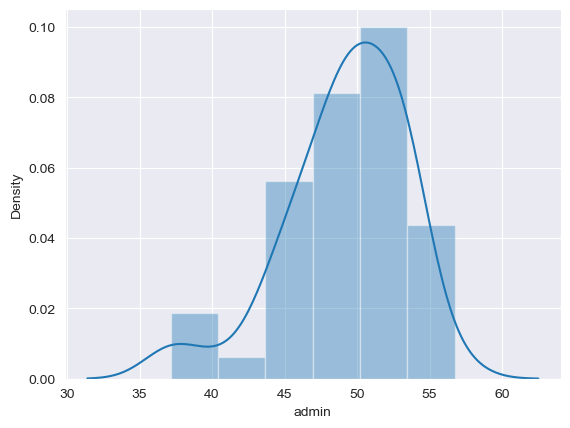

In [54]:
sns.distplot(np.cbrt(df3['admin']), bins = 6, kde = True)

<Axes: xlabel='marketing', ylabel='Density'>

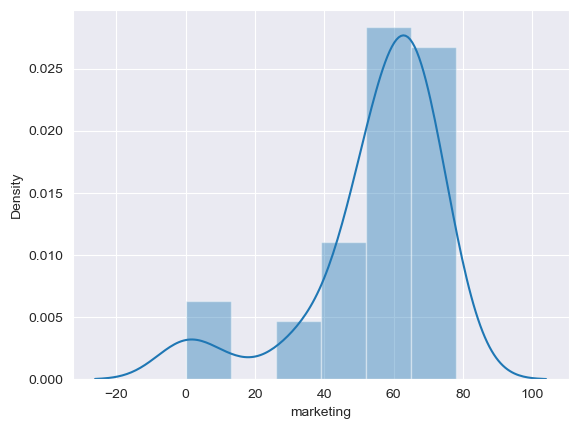

In [55]:
sns.distplot(np.cbrt(df3['marketing']), bins = 6, kde = True)

<Axes: xlabel='profit', ylabel='Density'>

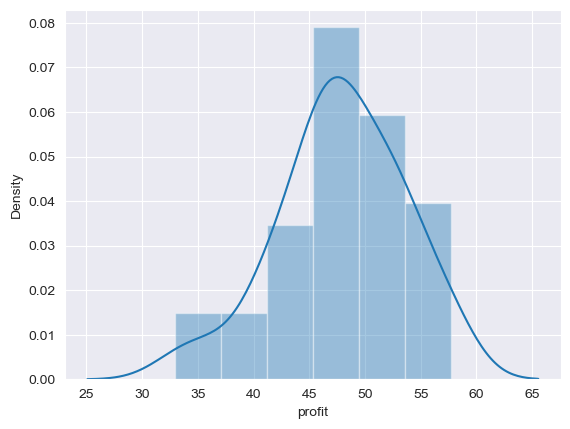

In [56]:
sns.distplot(np.cbrt(df3['profit']), bins = 6, kde = True)

#### Droping the column state as it is irrelevant for model building.

In [57]:
df4=df3.drop('state',axis=1)
df4.head()

,RnD,admin,marketing,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


### Checking correlation between the columns

In [58]:
df4.corr()

,RnD,admin,marketing,profit
RnD,1.000000,0.243438,0.711654,0.978437
admin,0.243438,1.000000,-0.037280,0.205841
marketing,0.711654,-0.037280,1.000000,0.739307
profit,0.978437,0.205841,0.739307,1.000000


<Axes: >

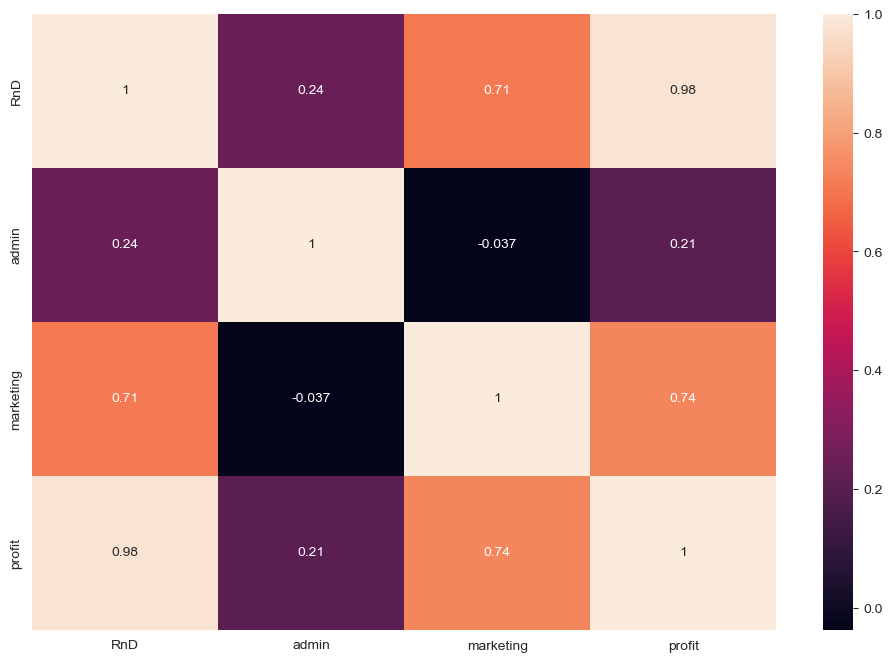

In [59]:
plt.figure(figsize=(12,8))
sns.heatmap(df4.corr(),annot=True)

#### Plotting correlation

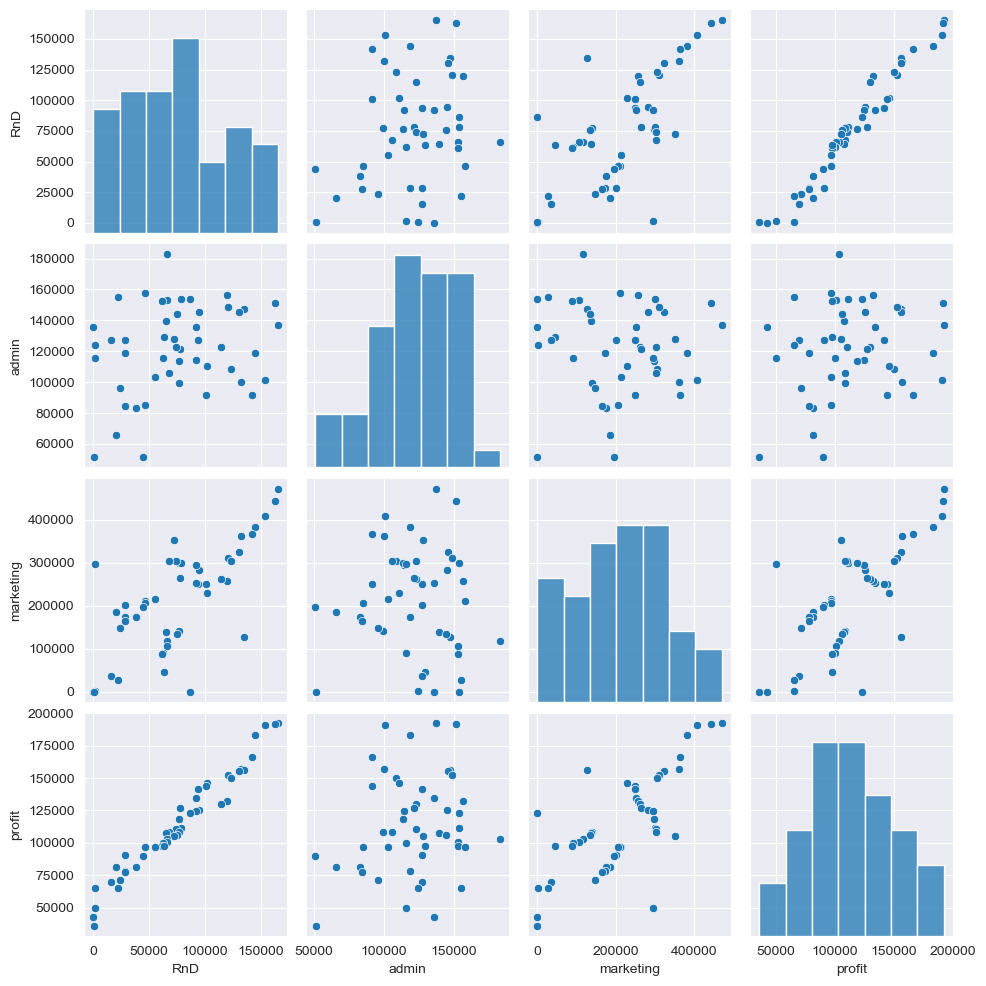

In [60]:
sns.set_style(style='darkgrid')
sns.pairplot(df4)

#### <font color= 'Brown'> Model Building </font>

In [61]:
model = sm.ols("profit~RnD+admin+marketing", data = df).fit()

In [62]:
model.params

Intercept    50122.192990
RnD              0.805715
admin           -0.026816
marketing        0.027228
dtype: float64

In [63]:
model.tvalues , np.round(model.pvalues,5)

(Intercept     7.626218
 RnD          17.846374
 admin        -0.525507
 marketing     1.655077
 dtype: float64,
 Intercept    0.00000
 RnD          0.00000
 admin        0.60176
 marketing    0.10472
 dtype: float64)

In [64]:
model.rsquared , model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [65]:
slr_a=sm.ols("profit~admin",data=df).fit()
slr_a.tvalues , slr_a.pvalues 

(Intercept    3.040044
 admin        1.419493
 dtype: float64,
 Intercept    0.003824
 admin        0.162217
 dtype: float64)

In [66]:
slr_m=sm.ols("profit~marketing",data=df).fit()
slr_m.tvalues , slr_m.pvalues 

(Intercept    7.808356
 marketing    7.802657
 dtype: float64,
 Intercept    4.294735e-10
 marketing    4.381073e-10
 dtype: float64)

In [67]:
slr_am=sm.ols("profit~marketing+admin",data=df).fit()
slr_am.tvalues , slr_am.pvalues 

(Intercept    1.142741
 marketing    8.281039
 admin        2.467779
 dtype: float64,
 Intercept    2.589341e-01
 marketing    9.727245e-11
 admin        1.729198e-02
 dtype: float64)

#### Model validation

#### Calculating VIF values

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
x = df4[['marketing','admin','RnD']]
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] = [vif(x.values, i) for i in range(len(x.columns))]
vif_data.sort_values(by = ['VIF'])

,Features,VIF
1,admin,4.218831
0,marketing,7.589312
2,RnD,8.602235


In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
x = df4[['marketing','RnD']]
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] = [vif(x.values, i) for i in range(len(x.columns))]
vif_data.sort_values(by = ['VIF'])

,Features,VIF
0,marketing,7.186744
1,RnD,7.186744


#### Residual VS Regressor

In [70]:
admin_present_model= sm.ols('profit~RnD+admin', data= df4).fit()
admin_present_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     530.6
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           1.69e-32
Time:                        19:56:18   Log-Likelihood:                -508.03
No. Observations:                  49   AIC:                             1022.
Df Residuals:                      46   BIC:                             1028.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.682e+04   5105.017     11.131      0.000    4.65e+04    6.71e+04
RnD            0.8349      0.026     31.847      0.000       0.782       0.888
admin         -0.0464      0.042     -1.110      0.273      -0.131       0.038
==============================================================================
Omnibus:                        0.444   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.245
Skew:                          -0.173   Prob(JB):                        0.885
Kurtosis:                       2.972   Cond. No.                     6.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

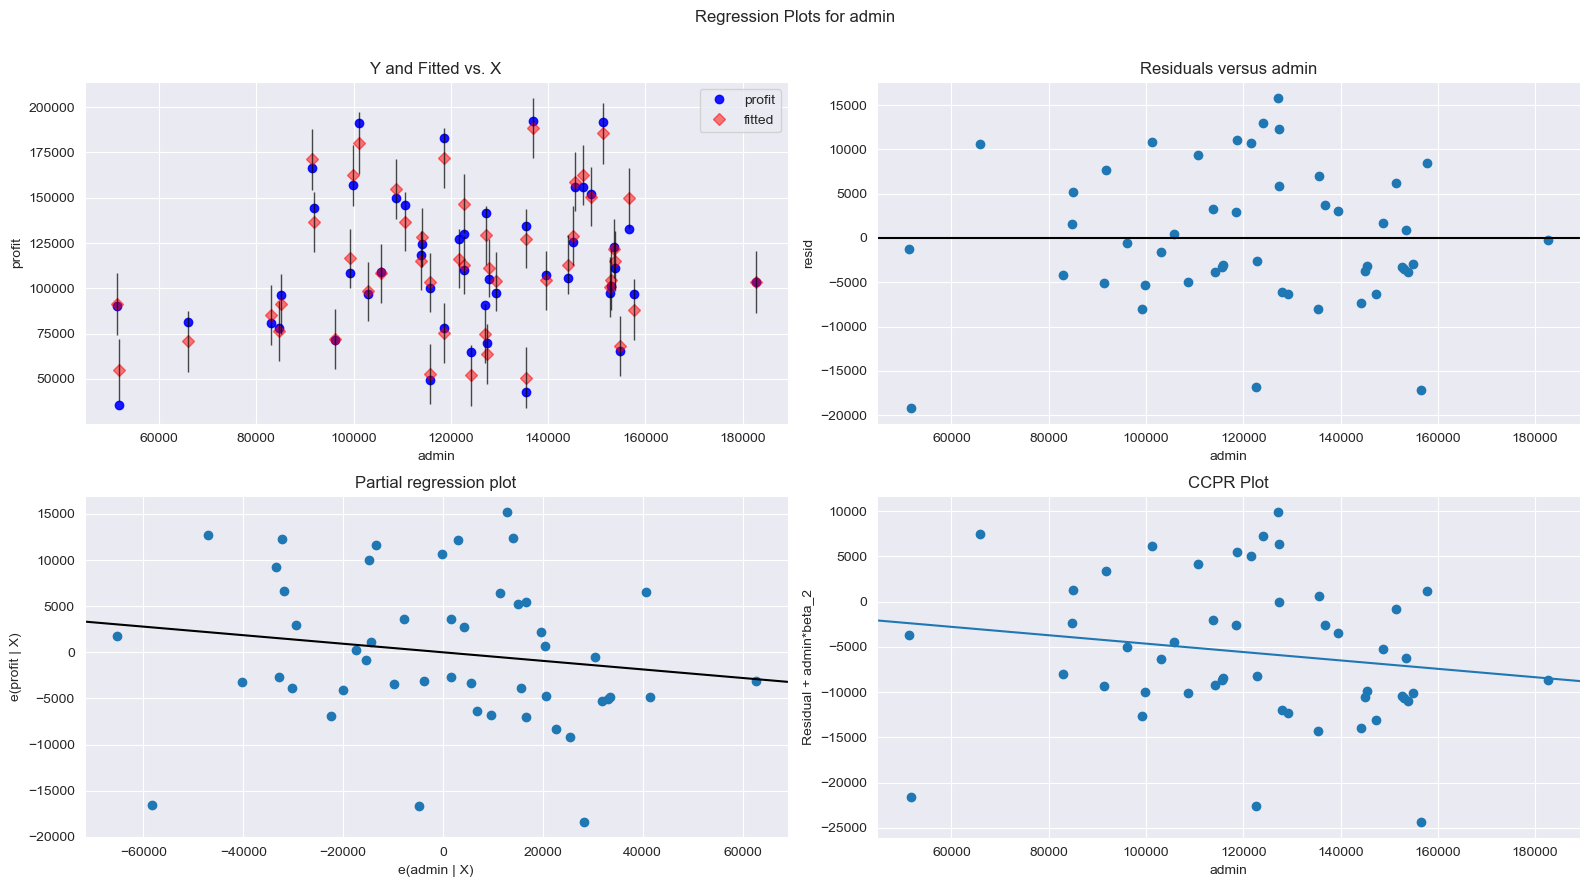

In [71]:
fig = plt.figure(figsize = (16,9))
smf.graphics.plot_regress_exog(admin_present_model, 'admin', fig=fig)
plt.show()

In [72]:
marketing_present_model= sm.ols('profit~RnD+marketing', data= df4).fit()
marketing_present_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           3.74e-33
Time:                        19:56:20   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RnD            0.7754      0.035     22.136      0.000       0.705       0.846
marketing      0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

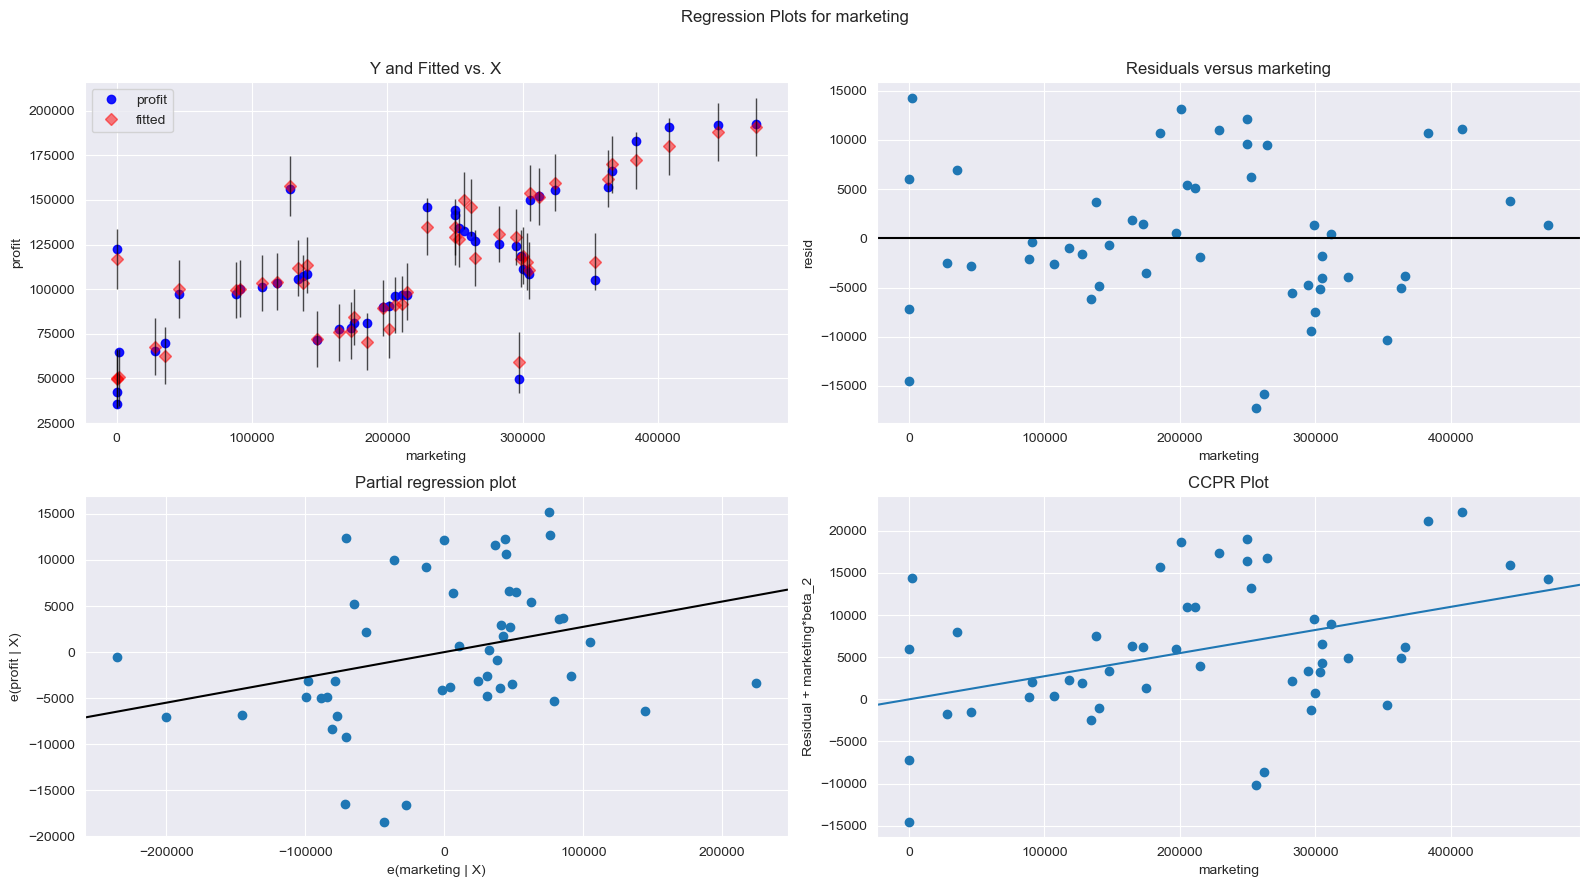

In [73]:
fig = plt.figure(figsize = (16,9))
smf.graphics.plot_regress_exog(marketing_present_model, 'marketing', fig=fig)
plt.show()

In [74]:
only_RnD_model= sm.ols('profit~RnD', data=df4).fit()
only_RnD_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           7.56e-34
Time:                        19:56:22   Log-Likelihood:                -508.68
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      47   BIC:                             1025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.172e+04   2229.914     23.195      0.000    4.72e+04    5.62e+04
RnD            0.8278      0.025     32.477      0.000       0.777       0.879
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                     1.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

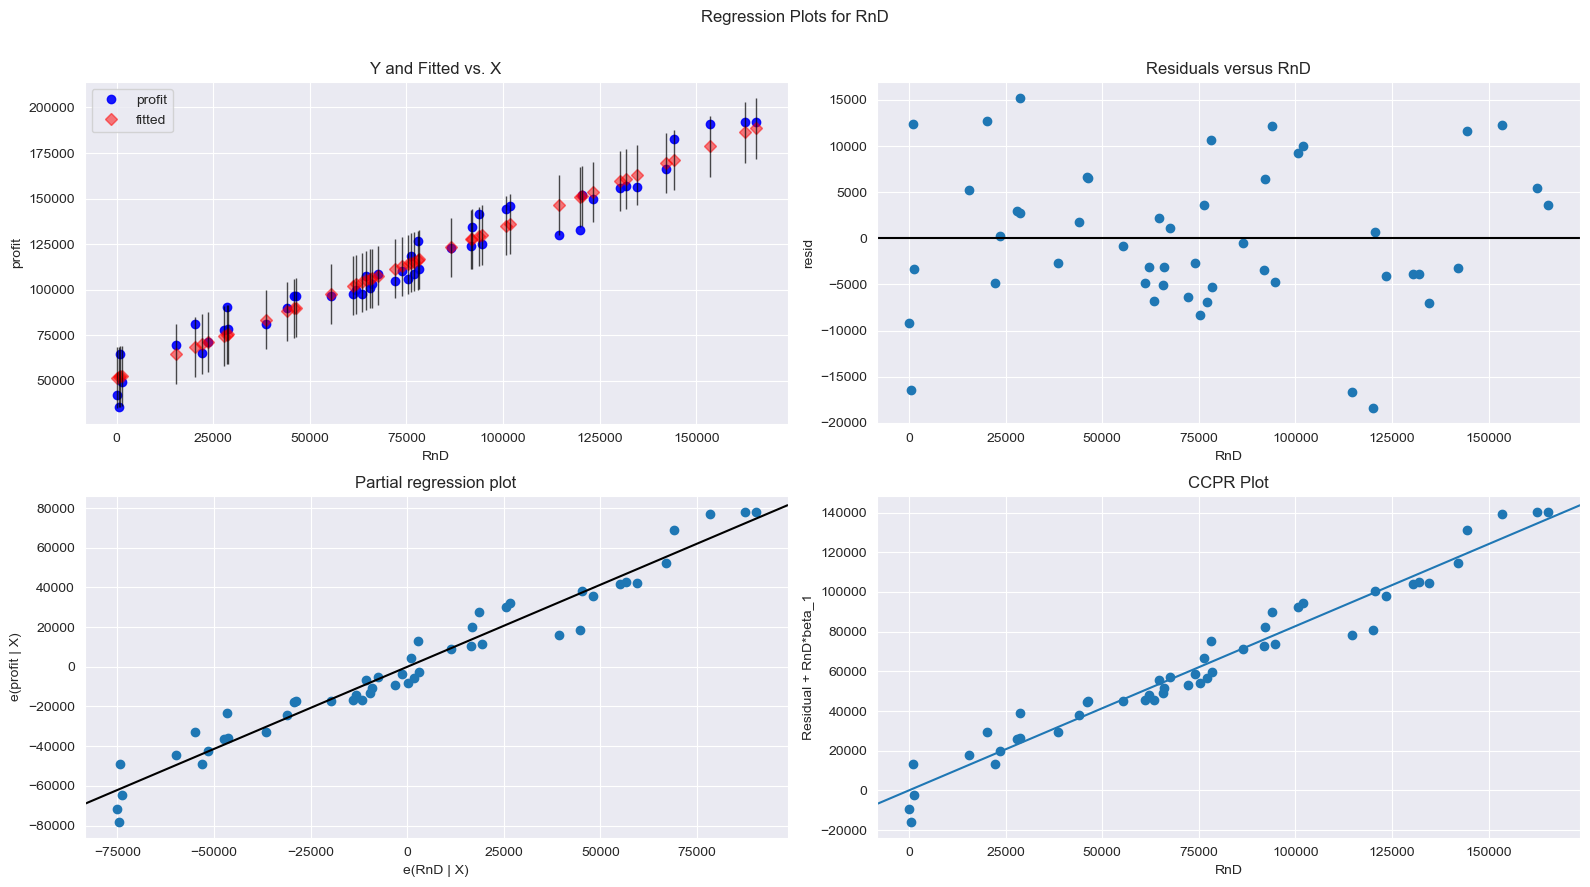

In [75]:
fig = plt.figure(figsize = (16,9))
smf.graphics.plot_regress_exog(only_RnD_model, 'RnD', fig=fig)
plt.show()

#### Residual Analysis

In [76]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

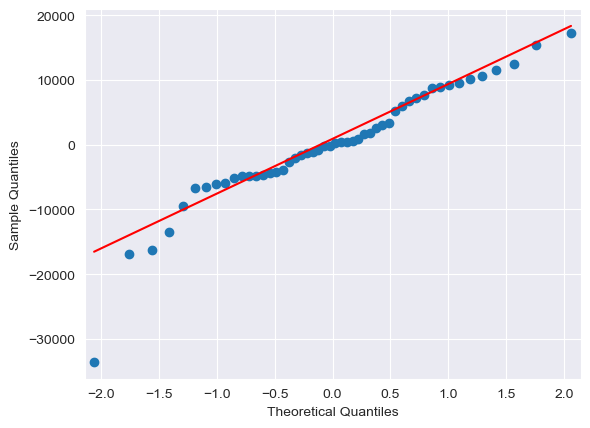

In [77]:
smf.qqplot(model.resid, line='q');

In [78]:
np.argmax(model.resid), np.max(model.resid)

(45, 17275.430313093617)

In [79]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [80]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

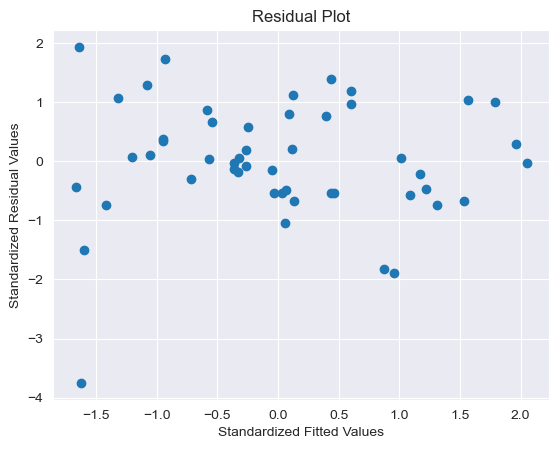

In [81]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

#### Detecting influcener values 
Using Cooks Distance

In [82]:
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

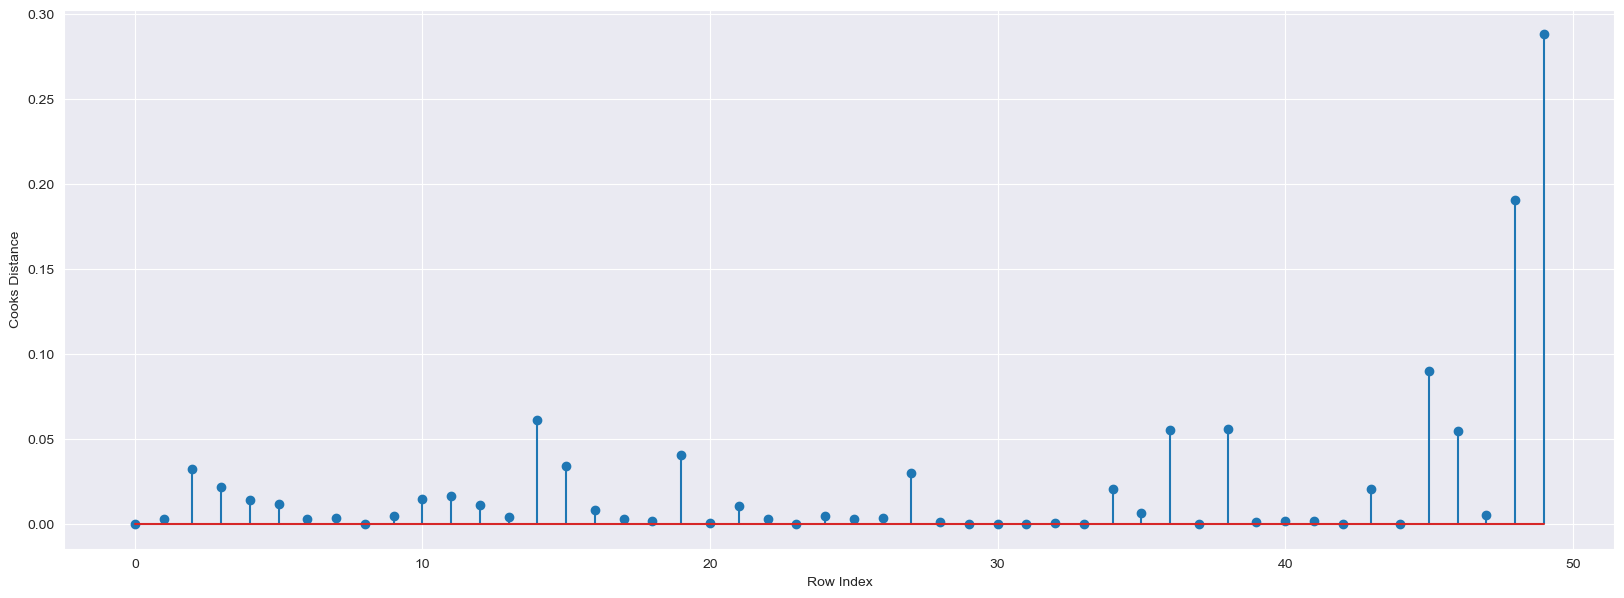

In [83]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [84]:
np.argmax(c) , np.max(c)

(49, 0.28808229275432634)

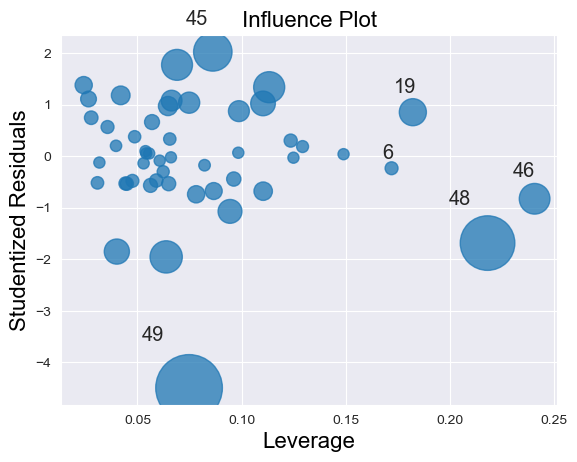

In [85]:
influence_plot(model)
plt.show()

##### Model improvement

In [88]:
model2=sm.ols("profit~RnD+admin+marketing",data=df).fit()

In [89]:
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=sm.ols("profit~RnD+admin+marketing",data=df).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        df4=df.drop(df.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        df4
    else:
        final_model=sm.ols("profit~RnD+admin+marketing",data=df).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

KeyboardInterrupt: 

In [90]:
final_model.rsquared

0.9507459940683246

In [91]:
df4

,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### Model Predictions

In [92]:
new_data=pd.DataFrame({'RnD':70000,"admin":90000,"marketing":140000},index=[0])
new_data

,RnD,admin,marketing
0,70000,90000,140000


In [93]:
model.predict(new_data)

0    107920.738401
dtype: float64

In [94]:
pred_y=model.predict(df4)
pred_y

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
dtype: float64

#### R^2 Table

In [95]:
d2={'Prep_Models':['Model','Model'],'Rsquared':[model.rsquared,model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Model,0.950746
